## EDA (Correlation Matrix)

In [159]:
# Importing the formatted data 
import pandas as pd
df = pd.read_csv('../data/cleaned2021-2022.csv')

df = df.dropna().reset_index(drop=True)
df

,Player,salary,Season,Position,Age,Team,Games Played,Games Started,Minutes Played,Field Goals Made,...,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored
0,Stephen Curry,45780966,2022,PG,33,GSW,64,64.0,2211.0,535,...,0.923,34.0,301.0,335.0,404,85.0,23.0,206.0,130,1630
1,James Harden,44310840,2022,PG,32,TOT,65,65.0,2419.0,407,...,0.877,55.0,445.0,500.0,667,82.0,36.0,284.0,153,1432
2,Russell Westbrook,44211146,2022,PG,33,LAL,78,78.0,2678.0,548,...,0.667,110.0,470.0,580.0,550,75.0,20.0,295.0,235,1441
3,Kevin Durant,42018900,2022,PF,33,BRK,55,55.0,2047.0,578,...,0.910,29.0,378.0,407.0,351,48.0,52.0,191.0,113,1643
4,LeBron James,41180544,2022,C,37,LAL,56,56.0,2084.0,640,...,0.756,63.0,396.0,459.0,349,73.0,59.0,196.0,121,1695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Micah Potter,53176,2022,C,23,DET,3,0.0,31.0,5,...,1.000,4.0,5.0,9.0,0,1.0,1.0,1.0,4,12
448,Cameron McGriff,53176,2022,SF,24,POR,3,0.0,46.0,5,...,1.000,6.0,9.0,15.0,3,0.0,1.0,0.0,7,14
449,Jordan Schakel,53176,2022,SG,23,WAS,4,0.0,30.0,1,...,1.000,2.0,6.0,8.0,0,1.0,0.0,1.0,0,5
450,Zavier Simpson,37223,2022,PG,24,OKC,4,4.0,174.0,19,...,1.000,2.0,19.0,21.0,30,5.0,4.0,10.0,15,44


In [160]:
df.columns.to_list()

['Player',
 'salary',
 'Season',
 'Position',
 'Age',
 'Team',
 'Games Played',
 'Games Started',
 'Minutes Played',
 'Field Goals Made',
 'Field Goals Attempted',
 'Field Goals Percentage',
 'Three Pointers Made',
 'Three Pointers Attempted',
 'Three Pointers Percentage',
 'Two Pointers Made',
 'Two Pointers Attempted',
 'Two Pointers Percentage',
 'Effective Field Goal Percentage',
 'Free Throws Made',
 'Free Throws Attempted',
 'Free Throw Percentage',
 'Offensive Rebounds',
 'Defensive Rebounds',
 'Total Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal Fouls',
 'Points Scored']

In [161]:
# Doing EDA on some of the numerical features and our target predictor (salary)

eda_columns = ['salary', 'Age', 'Games Played', 'Games Started', 'Minutes Played', 'Field Goals Made', 'Three Pointers Made', 'Two Pointers Made', 'Effective Field Goal Percentage','Free Throws Made', 'Offensive Rebounds', 'Defensive Rebounds', 'Assists', 'Blocks', 'Points Scored']
df_eda = df[eda_columns]

<Axes: >

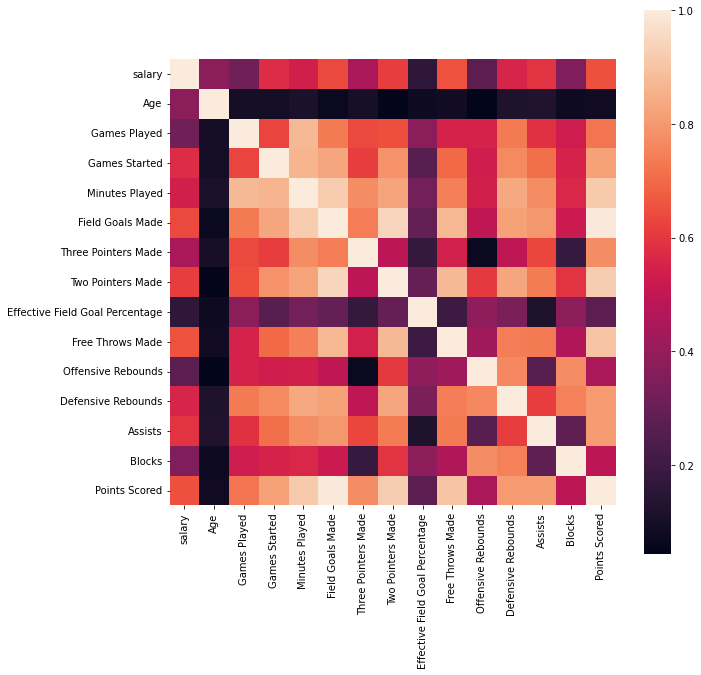

In [162]:
# Plotting a heatmap of the correlation matrix of our eda_columns defined above

import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
corr = df_eda.corr(numeric_only=True)
sns.heatmap(corr, square=True)

## Linear Regression

In [163]:
# Before we do regression, we need to find the numeric columns of our `df` (not including salary, our predictor)

from pandas.api.types import is_numeric_dtype

columns = df.columns.to_list()
numerical_features = [col for col in columns if is_numeric_dtype(df[col]) and col != 'salary']
numerical_features 

['Season',
 'Age',
 'Games Played',
 'Games Started',
 'Minutes Played',
 'Field Goals Made',
 'Field Goals Attempted',
 'Field Goals Percentage',
 'Three Pointers Made',
 'Three Pointers Attempted',
 'Three Pointers Percentage',
 'Two Pointers Made',
 'Two Pointers Attempted',
 'Two Pointers Percentage',
 'Effective Field Goal Percentage',
 'Free Throws Made',
 'Free Throws Attempted',
 'Free Throw Percentage',
 'Offensive Rebounds',
 'Defensive Rebounds',
 'Total Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal Fouls',
 'Points Scored']

In [164]:
# We then train a linear regression model with 10 fold cross-validation, saving the r^2 scores and models
from sklearn import linear_model, model_selection

X = df[numerical_features]
y = df.salary
xval = model_selection.KFold(10, shuffle=True)
model = linear_model.LinearRegression()
results = model_selection.cross_validate(model, X, y, cv=xval, scoring='r2', return_train_score=True, return_estimator=True)
results

{'fit_time': array([0.00501013, 0.00299859, 0.00299978, 0.00413752, 0.00400257,
        0.00400043, 0.00400019, 0.00302052, 0.00400019, 0.00299954]),
 'score_time': array([0.00199056, 0.00200057, 0.00300717, 0.00103974, 0.00199628,
        0.0019989 , 0.00199914, 0.00197721, 0.00200009, 0.00200009]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_score': array([0.50373802, 0.04516839, 0.5541336 , 0.53143344, 0.75888339,
        0.58829366, 0.66649552, 0.78148222, 0.5578559 , 0.45215058]),
 'train_score': array([0.64037271, 0.67014158, 0.63974086, 0.64560333, 0.62342457,
        0.63720271, 0.62565411, 0.60631667, 0.64074795, 0.64461546])}

In [165]:
# Printing out some preliminary scoring statistics (mean R^2 performance on training / testing splits)
train_r2 = results['train_score'].mean()
train_r2_sd = results['train_score'].std()
test_r2 = results['test_score'].mean()
test_r2_sd = results['test_score'].std()

print(' Mean R^2 : ', test_r2, '\n', 'R^2 SD : ', test_r2_sd, '\n', 'Mean Train R^2 : ', train_r2)

 Mean R^2 :  0.5439634719222548 
 R^2 SD :  0.19464908343061654 
 Mean Train R^2 :  0.6373819939146068


In [166]:
# Now, we want to iterate through the results and find the best model (using the metric of avg(train_score, test_score))

best_score = 0
best_idx = 0 
for index, score in enumerate(results['test_score']):
    train_test_score = (results['test_score'][index] + results['train_score'][index]) / 2 
    if train_test_score > best_score:
        best_score = train_test_score
        best_idx = index 

print('Best Train + Test Score Avg: ', best_score, f'(at index {index - 1})') # enumerate() is zero-indexed, so we know it's at idx - 1 of estimators

Best Train + Test Score Avg:  0.6938994435633687 (at index 8)


In [167]:
# Saving our best model 

best_linear_model = results['estimator'][index - 1]
best_linear_model 

LinearRegression()

In [168]:
# Adding a prediction using our best model

df['salary_prediction'] = best_linear_model.predict(df[numerical_features])

Text(0, 0.5, 'Predicted Salary')

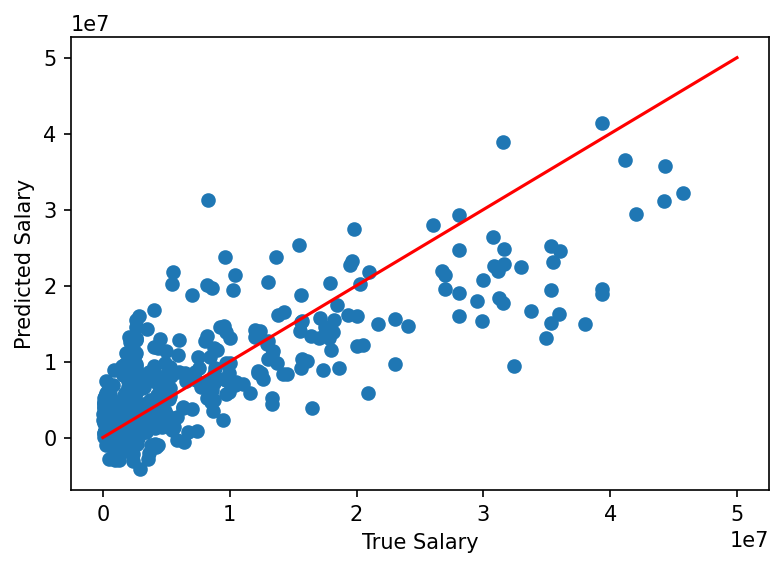

In [169]:
# Visualizing our best model predictions versus observed values of salary

import matplotlib.pyplot as plt 

plt.figure(dpi=150)
plt.scatter(df.salary, df.salary_prediction)
plt.plot([0, 5e7], [0, 5e7], color='red')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')

In [170]:
# We can observe the model's prediction of some well-known NBA players

def num_to_cash(num):
    return '${:,.2f}'.format(num)

curry = df[df.Player == 'Stephen Curry']
lebron = df[df.Player == 'LeBron James']
giannis = df[df.Player == 'Giannis Antetokounmpo']
kyrie = df[df.Player == 'Kyrie Irving']
derozan = df[df.Player == 'DeMar DeRozan']
lavine = df[df.Player == 'Zach LaVine']

print('Model Estimated Salary for Curry: ', num_to_cash(best_linear_model.predict(curry[numerical_features])[0]))
print('Model Estimated Salary for LeBron: ', num_to_cash(best_linear_model.predict(lebron[numerical_features])[0]))
print('Model Estimated Salary for Giannis: ', num_to_cash(best_linear_model.predict(giannis[numerical_features])[0]))
print('Model Estimated Salary for Kyrie: ', num_to_cash(best_linear_model.predict(kyrie[numerical_features])[0]))
print('Model Estimated Salary for Deebo: ', num_to_cash(best_linear_model.predict(derozan[numerical_features])[0]))
print('Model Estimated Salary for Lavine: ', num_to_cash(best_linear_model.predict(lavine[numerical_features])[0]))


Model Estimated Salary for Curry:  $32,132,352.44
Model Estimated Salary for LeBron:  $36,560,934.46
Model Estimated Salary for Giannis:  $41,421,969.96
Model Estimated Salary for Kyrie:  $15,016,841.70
Model Estimated Salary for Deebo:  $27,910,718.44
Model Estimated Salary for Lavine:  $22,722,603.13


## Clustering